# Homework 04 - TensorFlow

In this homework you will practice what you learned about TensorFlow. You will implement the same network as in the last homework. But instead of using NumPy you will use TensorFlow.

In [1]:
import numpy as np
import tensorflow as tf

### Build the dataset.

In [2]:
x = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=np.float32)
t = np.array([0,1,1,0], dtype=np.float32)
train_dataset = tf.data.Dataset.from_tensor_slices((x,t))

### The model.

We will build the following model

![model](https://raw.githubusercontent.com/lukeeffenberger/IANNWTF-2019/master/homework-figures/mlp_xor.png)

The activation function for **all** neurons is the logistic function

$$ \sigma(x) = \frac{1}{1+e^{-x}}. $$

You can reuse many parts from the notebook from the TensorFlow lecture.

When building the model make sure to do the following:
* initialize the weights with a random normal distribution with mean 0.0 and standard deviation 0.5
* initialize the biases with a random normal distribution with mean 0.0 and standard deviation 0.05 

Check 'tf.random_normal_initializer()'.


### Implement the model.

In [3]:
from tensorflow.keras.layers import Layer

### YOUR CODE HERE ###
# Implementing the class for a linear layer.
class Linear(Layer):
    """y = w.x + b"""
    
    # Initializing the super class "Layer" and specifying the parameters.
    def __init__(self, units):
        super(Linear, self).__init__()
        # Linear layer takes output neurons as argument.
        self.units = units
        
    # Defining weight matrix and bias vector for the layer.
    def build(self, input_shape):
        self.w = self.add_weight(
                        shape=(input_shape[-1], self.units),
                        initializer=tf.random_normal_initializer(mean=0, stddev=0.5),
                        trainable=True
        )
        self.b = self.add_weight(
                        shape=([self.units]),
                        initializer=tf.random_normal_initializer(mean=0, stddev=0.05),
                        trainable=True
        )
     
    # Call function used to define our return.
    def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

######################

In [4]:
### YOUR CODE HERE ###
# Implement the class for the MLP.
# Check 'tf.math.sigmoid()' for the activation function.
class MLP(Layer):
    
    def __init__(self):
        super(MLP, self).__init__()
        # Instantiating our layers; one with 4 neurons (hidden layer) 
        # and one with one neuron (output layer).
        self.hidden_layer = Linear(4)
        self.output_layer = Linear(1)
        
    # Call function used to define our return for a forward step.
    def call(self, x):
        x = self.hidden_layer(x)
        x = tf.math.sigmoid(x)
        x = self.output_layer(x)
        x = tf.math.sigmoid(x)
        return x
######################

### Train the model.

Now that the model is built we train the network. Again you can reuse parts from the lecture. Note that we do not use any test data here, because there are only four data points.

Make sure you do the following:
* Use mean squared error as loss function.
* Use the SGD optimizer with learning rate 1.
* Train for 500 epochs.
* For each epoch calculate the loss and accuracy and store it in a list. Note that there are no test data.

If your model is not able to achieve 100% accuracy try and run it again. Sometimes you just have bad luck with initialization.

In [5]:
# Clearing the session.
tf.keras.backend.clear_session()

### YOUR CODE HERE ###
# Defining MSE as our loss function.
mse = tf.keras.losses.MeanSquaredError()
# SGD optimizer with learning rate 1.
optimizer = tf.keras.optimizers.SGD(learning_rate=1)
# Here we define some lists to store the training progress.
losses = []
accuracies = []
epochs = []

# Initialize and train the MLP.
mlp = MLP()
for epoch in range(500):
    epochs.append(epoch)

    # Buffer to calculate loss and accuracy for each epoch.
    loss_buffer = 0
    accuracy_buffer = 0
    
    # Training loop.
    for (x,y) in train_dataset:
        
        # We have to reshape the input to get 2D input.
        # By using -1 for the batch size, TF will automatically get the right
        # batch size that is fitting our input dimension.
        x = tf.reshape(x, shape=(-1,2))
        # Starting gradient tape and feeding data to the network.
        with tf.GradientTape() as tape:
            output = mlp(x)
            loss = mse(y, output)
            gradients = tape.gradient(loss, mlp.trainable_variables)
        
        # After the tape recording we apply the gradients to the variables.
        optimizer.apply_gradients(zip(gradients, mlp.trainable_variables))

        # Store performance in buffer.
        accuracy_buffer += int(float(output>=0.5) == y)
        loss_buffer += loss

    # monitoring the training process
    if (epoch+1) % 100 == 0:
        print(f"Epoch {epoch+1}/500, Loss: {loss_buffer}, Accuracy: {accuracy_buffer/4}")

    # Appending the losses and accuracies to their lists (adivided by 4 so x and y are in same shape for plotting)
    losses.append(loss_buffer)
    accuracies.append(accuracy_buffer/4)
#######################

Epoch 100/500, Loss: 1.1419072151184082, Accuracy: 0.5
Epoch 200/500, Loss: 0.8357043266296387, Accuracy: 0.75
Epoch 300/500, Loss: 0.5330669283866882, Accuracy: 0.75
Epoch 400/500, Loss: 0.05721330642700195, Accuracy: 1.0
Epoch 500/500, Loss: 0.02264593169093132, Accuracy: 1.0


### Visualize the training progress.

In [6]:
import matplotlib.pyplot as plt

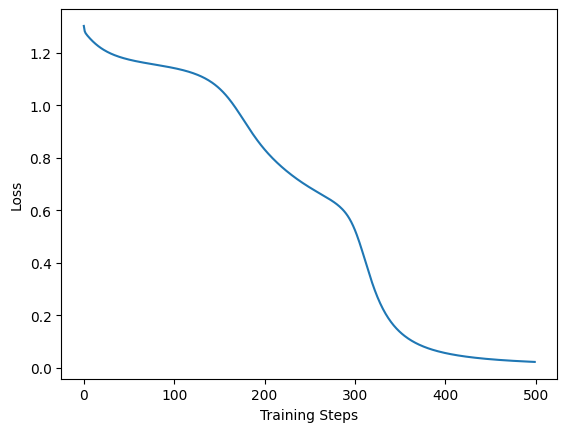

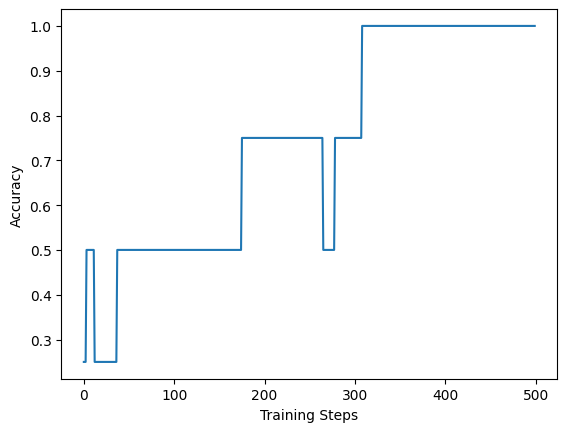

In [7]:
### YOUR CODE HERE ###
# Plotting our training progress.
plt.figure()
plt.plot(epochs, losses)
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.show()

plt.figure()
plt.plot(epochs, accuracies)
plt.xlabel("Training Steps")
plt.ylabel("Accuracy")
plt.show()
######################